1.1 Install yfinance

In [1]:
!pip install yfinance

You should consider upgrading via the 'c:\users\biyaa\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


1.2 Download Stock Data

In [2]:
import yfinance as yf

# Define the ticker symbols for the companies
tickers = ['AAPL', 'MSFT', 'TSLA']

# Download the data for the last 5 years
data = yf.download(tickers, start="2018-01-01", end="2023-01-01")

# Show the first few rows of the data
print(data.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 3 completed


Price           Close                             High                        \
Ticker           AAPL       MSFT       TSLA       AAPL       MSFT       TSLA   
Date                                                                           
2018-01-02  40.479836  79.474159  21.368668  40.489237  79.807036  21.474001   
2018-01-03  40.472794  79.844032  21.150000  41.017978  79.991981  21.683332   
2018-01-04  40.660793  80.546768  20.974667  40.764191  81.055332  21.236668   
2018-01-05  41.123718  81.545380  21.105333  41.210664  81.748805  21.149332   
2018-01-08  40.970982  81.628624  22.427334  41.267071  81.906024  22.468000   

Price             Low                             Open                        \
Ticker           AAPL       MSFT       TSLA       AAPL       MSFT       TSLA   
Date                                                                           
2018-01-02  39.774858  79.058067  20.733334  39.986353  79.640598  20.799999   
2018-01-03  40.409348  79.492666  21.03

1.3 Preprocess the Data

In [4]:
import pandas as pd

# Handle missing values (for simplicity, we’ll drop rows with missing values)
data = data.dropna()

# Convert the date to datetime format (if necessary)
data.index = pd.to_datetime(data.index)

# Extract closing prices for each company
close_prices = data['Close']

# Display the preprocessed data
print(close_prices.head())


Ticker           AAPL       MSFT       TSLA
Date                                       
2018-01-02  40.479836  79.474159  21.368668
2018-01-03  40.472794  79.844032  21.150000
2018-01-04  40.660793  80.546768  20.974667
2018-01-05  41.123718  81.545380  21.105333
2018-01-08  40.970982  81.628624  22.427334


2.1 Simple Moving Average (SMA)

You should consider upgrading via the 'c:\Users\biyaa\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


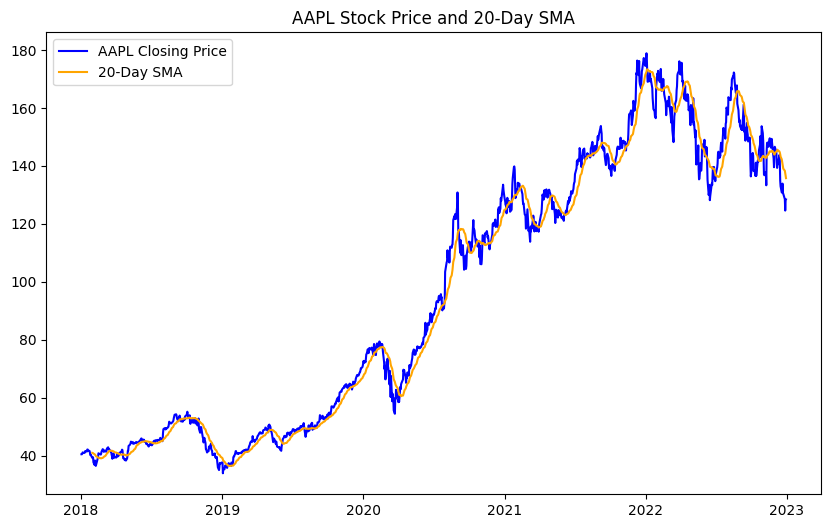

In [5]:
# Install matplotlib if not already installed
%pip install matplotlib

import matplotlib.pyplot as plt

# Calculate the 20-day Simple Moving Average (SMA)
sma_20 = close_prices['AAPL'].rolling(window=20).mean()

# Plot the SMA
plt.figure(figsize=(10, 6))
plt.plot(close_prices['AAPL'], label='AAPL Closing Price', color='blue')
plt.plot(sma_20, label='20-Day SMA', color='orange')
plt.legend()
plt.title('AAPL Stock Price and 20-Day SMA')
plt.show()


2.2 Exponential Moving Average (EMA)

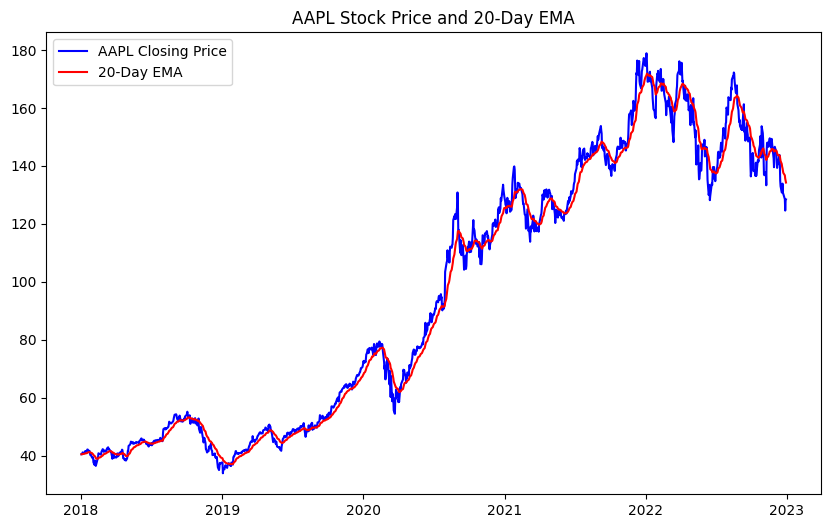

In [6]:
# Calculate the 20-day Exponential Moving Average (EMA)
ema_20 = close_prices['AAPL'].ewm(span=20, adjust=False).mean()

# Plot the EMA
plt.figure(figsize=(10, 6))
plt.plot(close_prices['AAPL'], label='AAPL Closing Price', color='blue')
plt.plot(ema_20, label='20-Day EMA', color='red')
plt.legend()
plt.title('AAPL Stock Price and 20-Day EMA')
plt.show()

2.3 Relative Strength Index (RSI)

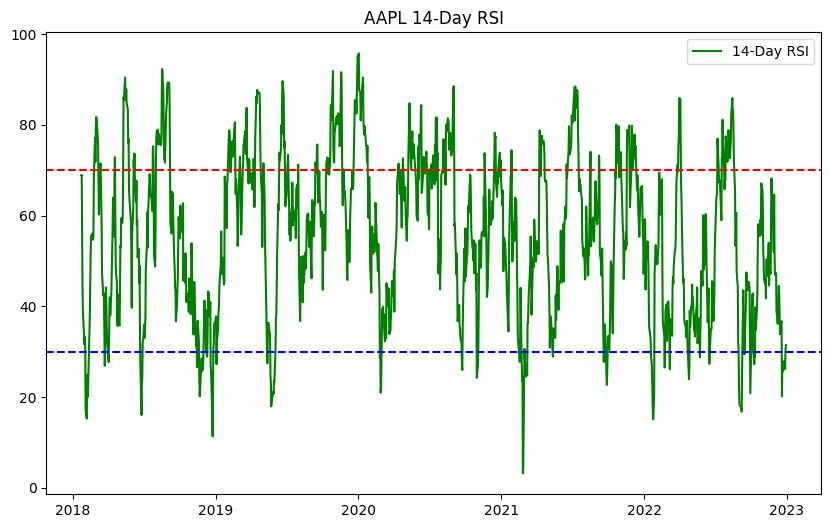

In [7]:
# Calculate the 14-day RSI
delta = close_prices['AAPL'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

average_gain = gain.rolling(window=14).mean()
average_loss = loss.rolling(window=14).mean()

rs = average_gain / average_loss
rsi = 100 - (100 / (1 + rs))

# Plot the RSI
plt.figure(figsize=(10, 6))
plt.plot(rsi, label='14-Day RSI', color='green')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='blue', linestyle='--')
plt.legend()
plt.title('AAPL 14-Day RSI')
plt.show()

2.4 Bollinger Bands

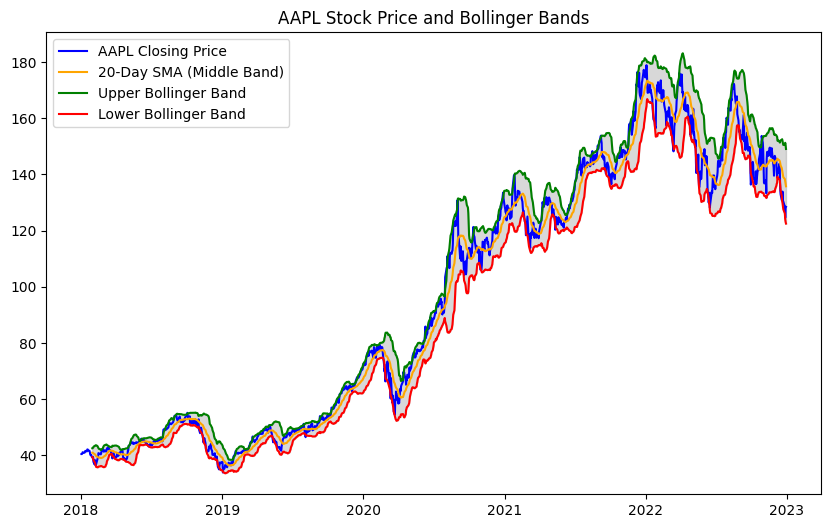

In [8]:
# Calculate the 20-day SMA (middle band)
middle_band = close_prices['AAPL'].rolling(window=20).mean()

# Calculate the standard deviation
std_dev = close_prices['AAPL'].rolling(window=20).std()

# Calculate the upper and lower Bollinger Bands
upper_band = middle_band + (std_dev * 2)
lower_band = middle_band - (std_dev * 2)

# Plot the Bollinger Bands
plt.figure(figsize=(10, 6))
plt.plot(close_prices['AAPL'], label='AAPL Closing Price', color='blue')
plt.plot(middle_band, label='20-Day SMA (Middle Band)', color='orange')
plt.plot(upper_band, label='Upper Bollinger Band', color='green')
plt.plot(lower_band, label='Lower Bollinger Band', color='red')
plt.fill_between(close_prices.index, upper_band, lower_band, color='gray', alpha=0.3)
plt.legend()
plt.title('AAPL Stock Price and Bollinger Bands')
plt.show()

3.1 Anomaly Detection Using Isolation Forest

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\biyaa\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.
C:\Users\biyaa\AppData\Local\Temp\ipykernel_6156\1129841207.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_prices['Anomalies'] = anomalies


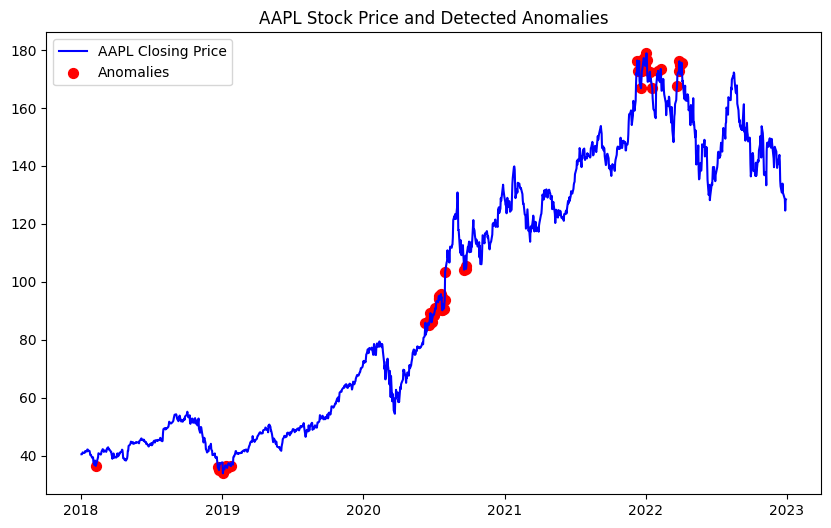

In [9]:
%pip install scikit-learn

from sklearn.ensemble import IsolationForest
import numpy as np

# Prepare the data (use the closing prices of Apple for this example)
data_for_isolation = close_prices['AAPL'].values.reshape(-1, 1)

# Train the Isolation Forest model
model = IsolationForest(contamination=0.05)  # 5% anomalies expected
model.fit(data_for_isolation)

# Predict anomalies (1 for normal, -1 for anomaly)
anomalies = model.predict(data_for_isolation)

# Convert predictions to a binary format (1 for normal, 0 for anomaly)
anomalies = np.where(anomalies == -1, 1, 0)

# Add the anomalies to the dataframe for visualization
close_prices['Anomalies'] = anomalies

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(close_prices['AAPL'], label='AAPL Closing Price', color='blue')
plt.scatter(close_prices.index[close_prices['Anomalies'] == 1], 
            close_prices['AAPL'][close_prices['Anomalies'] == 1], 
            color='red', label='Anomalies', marker='o', s=50)
plt.legend()
plt.title('AAPL Stock Price and Detected Anomalies')
plt.show()

4.1 Using Prophet for Time-Series Forecasting

In [10]:
%pip install prophet


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\biyaa\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


4.2 Code for Forecasting with Prophet and  Confidence Intervals:

01:38:05 - cmdstanpy - INFO - Chain [1] start processing
01:38:05 - cmdstanpy - INFO - Chain [1] done processing


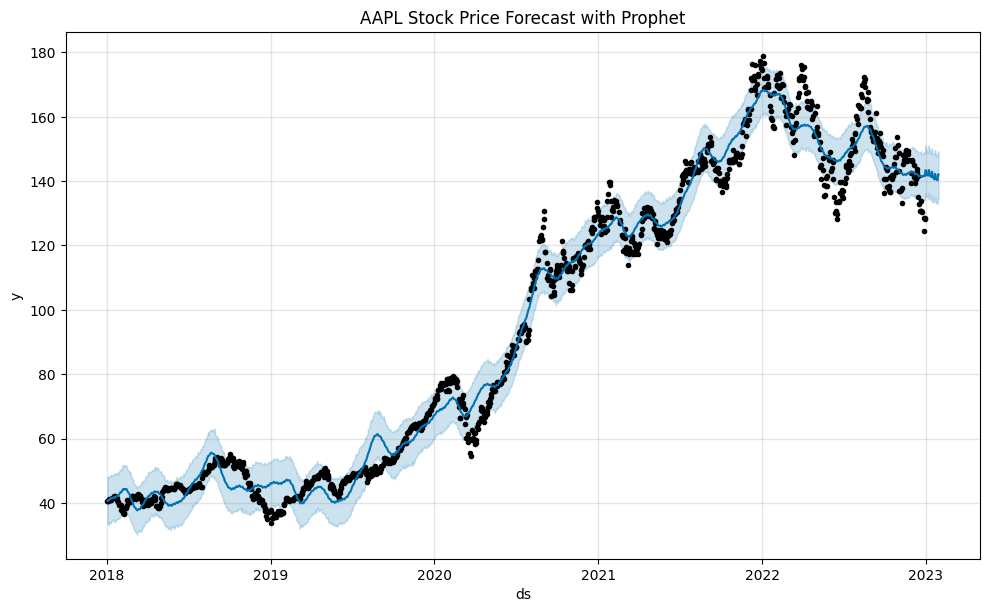

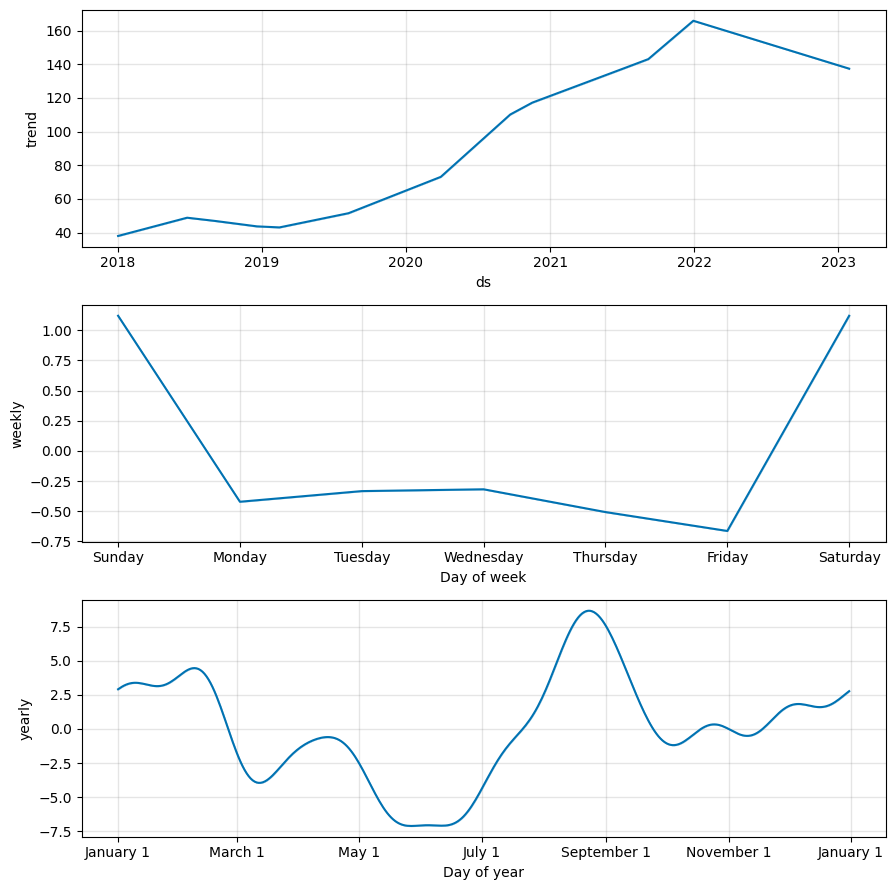

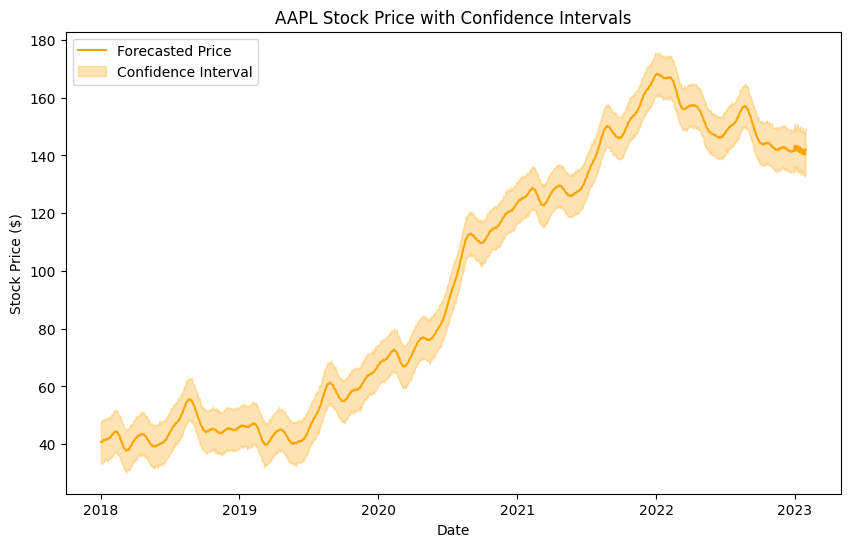

In [19]:
from prophet import Prophet

# Prepare the data for Prophet
prophet_data = close_prices['AAPL'].reset_index()[['Date', 'AAPL']]
prophet_data.columns = ['ds', 'y']  # Rename columns as per Prophet's requirement

# Initialize the Prophet model
model = Prophet()

# Fit the model
model.fit(prophet_data)

# Create a dataframe for future predictions (let's predict for the next 30 days)
future = model.make_future_dataframe(periods=30)

# Make predictions
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)
plt.title('AAPL Stock Price Forecast with Prophet')
plt.show()

# Plot the forecast components (trend, weekly, yearly seasonality)
model.plot_components(forecast)
plt.show()

# Plot forecasted price with confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted Price', color='orange')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.3, label='Confidence Interval')
plt.title('AAPL Stock Price with Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.legend()
plt.show()

4.3 Visualizing Anomalies:

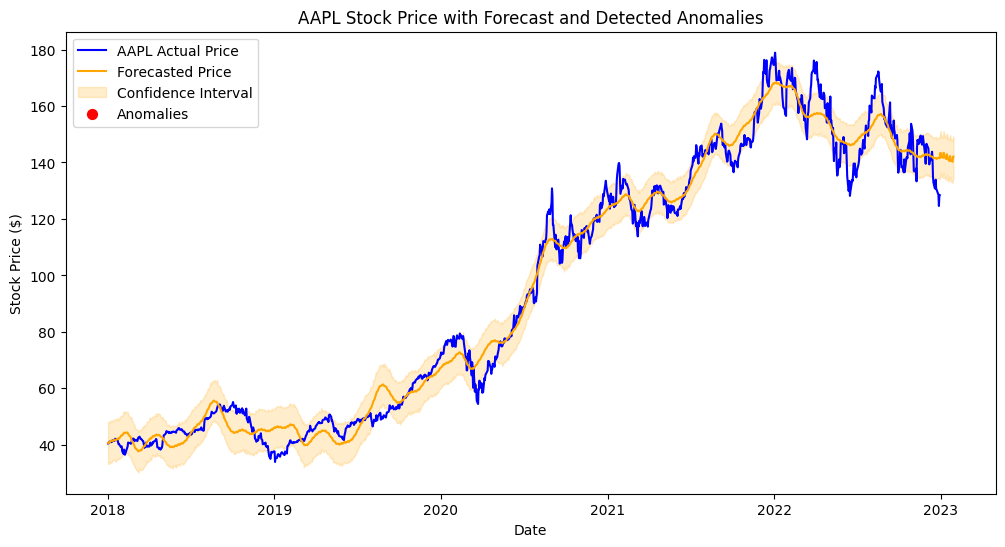

In [21]:
# Detect anomalies by comparing actual vs forecasted prices
forecasted_values = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].set_index('ds')  # Adding confidence intervals
actual_values = close_prices['AAPL']

# Merge actual values with forecasted values
merged_data = pd.merge(actual_values, forecasted_values, left_index=True, right_index=True, how='left')

# Calculate the deviation from forecast
merged_data['deviation'] = np.abs(merged_data['AAPL'] - merged_data['yhat'])

# Set a higher threshold for anomalies (e.g., deviation > 8 standard deviations)
threshold = merged_data['deviation'].std() * 8  # Increased threshold to 8 standard deviations
anomalies = merged_data[merged_data['deviation'] > threshold]

# Plot anomalies
plt.figure(figsize=(12, 6))

# Plot the actual stock price (AAPL Closing Price)
plt.plot(close_prices['AAPL'], label='AAPL Actual Price', color='blue')

# Plot the forecasted values (using the Prophet model)
plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted Price', color='orange')

# Add the confidence intervals
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.2, label='Confidence Interval')

# Highlight anomalies
plt.scatter(anomalies.index, anomalies['AAPL'], color='red', label='Anomalies', marker='o', s=50)

# Add labels and title
plt.title('AAPL Stock Price with Forecast and Detected Anomalies')
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.legend()

# Show the plot
plt.show()
